In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [130]:
dataset1 = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
dataset2 = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
dataset = pd.concat([loan_dataset1,loan_dataset2]) #combining both the dataset then later split for training and testing

In [131]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [132]:
dataset.drop(["Loan_ID"],axis=1,inplace=True)  #droped Loan_ID as it will not affect the loan eligibility 
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [133]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [134]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [135]:
dataset.shape   #shape of full dataset

(981, 12)

In [136]:
dataset1.shape

(614, 13)

In [137]:
dataset2.shape

(367, 12)

In [138]:
dataset["Dependents"].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [139]:
dataset=dataset.replace(to_replace="3+",value=4)  # did this because model will not predict the values properly so we have normalize that if dependents are more than 3 then it is 4
dataset["Dependents"].value_counts()

0    545
1    160
2    160
4     91
Name: Dependents, dtype: int64

In [140]:
dataset.isnull().sum()  #checking NAN values

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [141]:
dataset = dataset.dropna()   # we have droped the nan values becz we have various columns like gender,married,eduction,selfemployed and loan status etc ; so we cannot find mean,mode,mdeium of these that is why i droped the nan values 

In [142]:
dataset.isnull().sum()   # all NAN values gone

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [143]:
dataset.replace({"Married":{"No":0,"Yes":1},"Gender":{"Male":1,"Female":0},"Self_Employed":{"No":0,"Yes":1},"Education":{"Graduate":1,"Not Graduate":0},"Property_Area":{"Urban":1,"Rural":0,"Semiurban":0.5},"Loan_Status":{"Y":1,"N":0},},inplace=True)     # If model is in text format then our model cannot uderstand it properly that is why we need to convert the text values to numeric values; to properly train our model 

In [144]:
dataset.Property_Area.values   #Took semiurban as 0.5

array([0. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 0.5, 1. , 1. , 0. , 1. ,
       1. , 1. , 0. , 1. , 1. , 0.5, 0.5, 0.5, 1. , 1. , 1. , 0. , 0.5,
       0. , 0.5, 1. , 0.5, 1. , 1. , 0.5, 1. , 1. , 1. , 0.5, 0.5, 0.5,
       0.5, 1. , 1. , 0.5, 0.5, 0. , 1. , 1. , 1. , 1. , 0. , 0.5, 0.5,
       1. , 1. , 1. , 0.5, 1. , 0.5, 0.5, 0.5, 1. , 1. , 1. , 0.5, 0.5,
       1. , 1. , 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 1. , 0.5, 1. , 1. , 1. , 0.5, 1. , 0. , 0.5, 0. , 1. ,
       0.5, 0.5, 0.5, 0. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0. , 1. , 0.5,
       0. , 0. , 1. , 0.5, 0.5, 1. , 0.5, 1. , 1. , 0. , 0.5, 0. , 0. ,
       1. , 0. , 1. , 0.5, 1. , 0.5, 0.5, 1. , 0.5, 0. , 1. , 0. , 0. ,
       0.5, 0.5, 0. , 0.5, 0.5, 0. , 0. , 0.5, 0.5, 1. , 1. , 0.5, 0.5,
       0.5, 0.5, 0. , 0. , 0. , 0.5, 1. , 0.5, 0. , 0.5, 0. , 1. , 0.5,
       0.5, 1. , 0.5, 0.5, 1. , 0. , 1. , 0.5, 0.5, 0.5, 1. , 0. , 1. ,
       0.5, 0. , 0.5, 1. , 0.5, 0.5, 0.5, 0. , 0.5, 0. , 0.5, 0.

In [145]:
dataset.head()  #taking 1st 5 dataset avoid showing full dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1.0,1


In [242]:
dataset

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0.0,1
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0.0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1.0,1


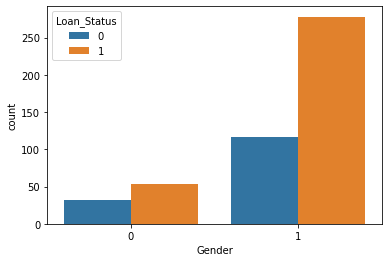

In [146]:
sns.countplot(x="Gender",hue="Loan_Status",data=dataset)  # graph showing loan status W.R.T Gender
plt.show()

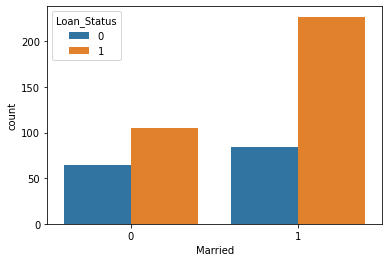

In [147]:
sns.countplot(x="Married",hue="Loan_Status",data=dataset)  #graph showing Loan status W.R.T Married
plt.show()

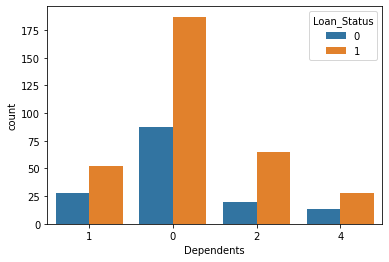

In [148]:
sns.countplot(x="Dependents",hue="Loan_Status",data=dataset)  #graph showing Loan status W.R.T Dependents
plt.show()

In [149]:
X = dataset.drop(columns=["Loan_Status"],axis=1) # X has all the dataset except Loan status
Y = dataset["Loan_Status"]                       # Y has only Loan status 

In [208]:
scaler = StandardScaler()   # we are standardizing our data becz in every dataset the range of values is different ; so it can create problem. So for better results we standardize our data
scaler.fit(X) #1st we need to fit and then tranform our X values 
data_standardized = scaler.transform(X)

In [209]:
data_standardized   # data has been standardized

array([[ 0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694, -1.31886834],
       [ 0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694,  1.25977445],
       ...,
       [ 0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 0.46719815,  0.73716237,  0.92945899, ...,  0.27554157,
         0.41319694,  1.25977445],
       [-2.14041943, -1.35655324, -0.70475462, ...,  0.27554157,
        -2.42015348, -0.02954695]])

In [210]:
X = data_standardized   # Taking the value of X only but in standardized form
Y = dataset["Loan_Status"]

In [211]:
from sklearn.model_selection import train_test_split   #Training out model
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=2) # 70% train and 30% test 

In [212]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (336, 11) (144, 11)


In [213]:
from sklearn import svm     # Making prediction using SVM model
loan_prediction=svm.SVC(kernel="linear")

In [214]:
loan_prediction.fit(X_train,Y_train)

SVC(kernel='linear')

In [215]:
from sklearn.metrics import accuracy_score
train_X_predict = loan_prediction.predict(X_train)
data_train_accuracy = accuracy_score(train_X_predict,Y_train)

In [216]:
data_train_accuracy   # Checking train accuracy  Note: if above 75% its good

0.8184523809523809

In [235]:
test_X_predict = loan_prediction.predict(X_test)
data_test_accuracy = accuracy_score(test_X_predict,Y_test)


In [236]:
data_test_accuracy   # Checking test accuracy    Note: if above 75% its good

0.7847222222222222

In [254]:
checking_data = (1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1.0)  #taking one full dataset as any example and will see whether our model currectly identify whether he is eligible for loan or not
array_conversion_of_checking_data = np.asarray(checking_data)

In [255]:
reshaping_data = array_conversion_of_checking_data.reshape(1,-1)  #reshaping data becz we want only one value as output

In [256]:
std_data = scaler.transform(reshaping_data)  #as we have standardized the data earlier so we cannot send the checking_data as it is we need to standardized it then we can move further

In [257]:
predicting_loan_status = loan_prediction.predict(std_data)

In [258]:
predicting_loan_status   # as I have taking 1-eligible for loan and 0-not eligible for loan so [1] mean he will get loan and [0] mean loan rejected

array([1], dtype=int64)

In [259]:
if(predicting_loan_status[0]==0):
    print("Not eligible for loan")
else:
    print("Eligible for loan")

Eligible for loan
